In [6]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
def dist(lang):
    w = torch.load(
        f"/home/mila/e/eric.elmoznino/scratch/complexity_compositionality/data/real_languages/coco-captions/{lang}/w.pt"
    )
    w = torch.cumsum(w == 2, dim=1)
    w = 1 - w
    w = w.sum(dim=1)
    return w.numpy()

In [10]:
leng = dist("english")
lfra = dist("french")
lspa = dist("spanish")
ldeu = dist("german")
ljap = dist("japanese")
l = pd.DataFrame(
    {
        "length": np.concatenate([leng, lfra, lspa, ldeu, ljap]),
        "language": ["english"] * len(leng)
        + ["french"] * len(lfra)
        + ["spanish"] * len(lspa)
        + ["german"] * len(ldeu)
        + ["japanese"] * len(ljap),
    }
)

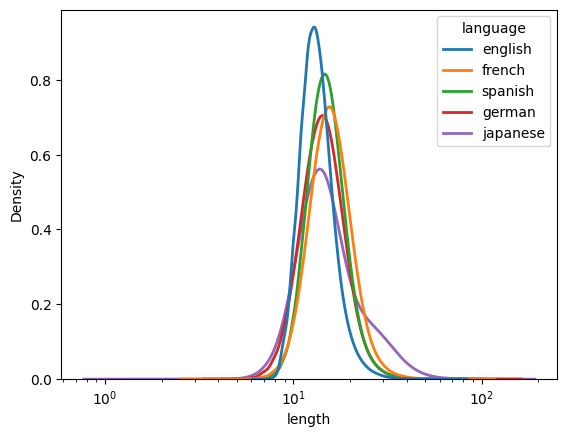

In [27]:
sns.kdeplot(
    data=l,
    x="length",
    hue="language",
    log_scale=True,
    bw_adjust=3.0,
    linewidth=2,)
plt.show()